# Example of loading one snapshot of CAPE/TCWV over S Asia and plotting the result

* ERA5 data but interpolated in time to on the half hour (to match MCS tracking)
* Only one file so far.

In [1]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
year = 2019
month = 6
day = 21
h = 6

e5time = dt.datetime(year, month, day, h, 0)

In [3]:
outdir = Path('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output') / 'regional_ERA5_data' / f'{e5time.year}' / f'{e5time.month:02d}' / f'{e5time.day:02d}'
filename = f'ecmwf-era5_oper_an_sfc_{e5time.year}{e5time.month:02d}{e5time.day:02d}{e5time.hour:02d}30.east_asia.nc'
outpath = outdir / filename
outpath

PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/2019/06/21/ecmwf-era5_oper_an_sfc_201906210630.east_asia.nc')

In [4]:
ds = xr.open_dataset(outpath)
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 221)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 164.5 164.8 165.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 0.75 0.5 0.25 0.0
    time       datetime64[ns] ...
Data variables:
    cape       (latitude, longitude) float64 ...
    tcwv       (latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-09 11:04:25 GMT by grib_to_netcdf-2.12.5: grib_to_n...

In [5]:
output_time = pd.Timestamp(ds.time.values.item())

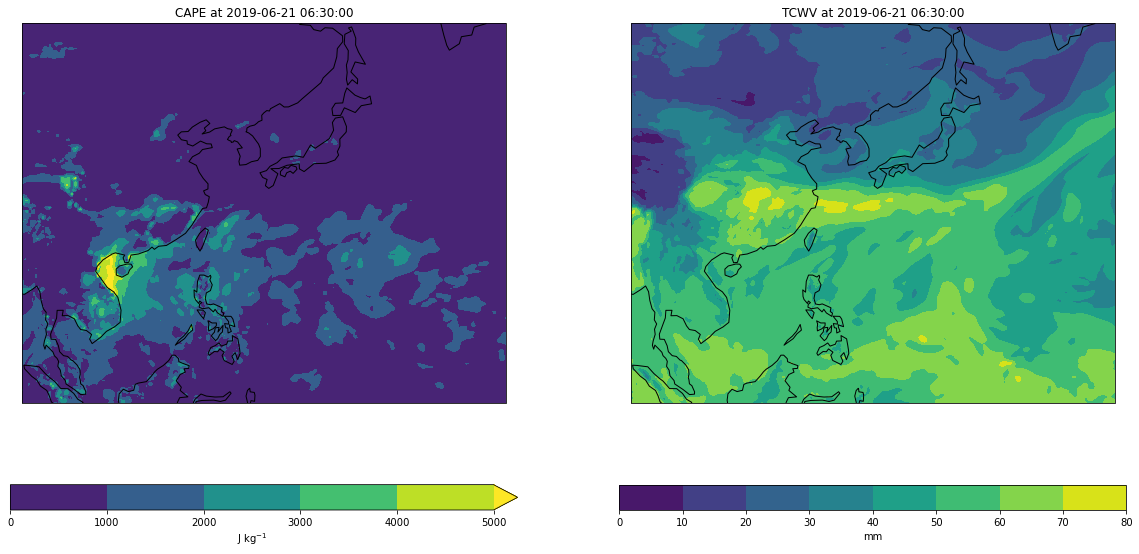

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(20, 10)
im1 = ax1.contourf(ds.longitude, ds.latitude, ds.cape, levels=np.linspace(0, 5000, 6), extend='max')
ax1.coastlines()
im2 = ax2.contourf(ds.longitude, ds.latitude, ds.tcwv)
ax2.coastlines()

ax1.set_title(f'CAPE at {output_time}')
ax2.set_title(f'TCWV at {output_time}')
plt.colorbar(im1, ax=ax1, orientation='horizontal', label='J kg$^{-1}$')
plt.colorbar(im2, ax=ax2, orientation='horizontal', label='mm');
